In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
import matplotlib.pyplot as plt
import pymc3 as pm
#from numpy.random import seed
from IPython.core.pylabtools import figsize
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [23]:
hourlydf = pd.read_csv(r'C:\Users\kisha\Documents\Springboard Data Science\Capstone Project 1\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\Hourly-Consolidated-cellid_day'
                       ,delimiter='\t')

In [64]:
mindf = pd.read_csv(r'C:\Users\kisha\Documents\Springboard Data Science\Capstone Project 1\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\10Mins-Consolidated-with-cellid.txt',delimiter='\t')

In [71]:
# mindf = mindf.reset_index()
mindf.iloc[::100000]

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,timeIntervalts
0,1,1383260400000,0.223227,0.156787,0.160938,0.052275,11.028366,0.380014,0.213213,2013-11-01 00:00:00+01:00
100000,6,1383266400000,0.139208,0.110554,0.000000,0.000000,7.380098,0.249762,0.000000,2013-11-01 01:40:00+01:00
200000,11,1383272400000,0.018473,0.027341,0.022517,0.000000,2.144789,0.045814,0.022517,2013-11-01 03:20:00+01:00
300000,14,1383278400000,0.024294,0.000000,0.021224,0.021224,1.324274,0.024294,0.042449,2013-11-01 05:00:00+01:00
400000,18,1383284400000,0.022136,0.000000,0.000000,0.016088,1.807730,0.022136,0.016088,2013-11-01 06:40:00+01:00
...,...,...,...,...,...,...,...,...,...,...
84500000,655,1388332200000,0.740948,0.768071,0.399968,0.372045,23.280913,1.509019,0.772012,2013-12-29 16:50:00+01:00
84600000,693,1388338200000,0.177022,0.111453,0.000000,0.203959,3.409906,0.288474,0.203959,2013-12-29 18:30:00+01:00
84700000,723,1388344200000,0.240823,0.178717,0.186110,0.149564,10.017383,0.419540,0.335674,2013-12-29 20:10:00+01:00
84800000,763,1388350200000,1.221851,0.832982,0.190120,0.417869,6.435247,2.054833,0.607989,2013-12-29 21:50:00+01:00


In [72]:
# mindf['timeIntervalts'] = pd.to_datetime(mindf['timeInterval'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('CET')
mindf = mindf.set_index(['cellId','timeIntervalts'])
mindf = mindf.groupby([pd.Grouper(level='cellId'),pd.Grouper(level='timeIntervalts',freq='H')]).sum()
mindf.iloc[::100000]

,,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call
cellId,timeIntervalts,,,,,,,,
1,2013-11-01 00:00:00+01:00,8299571400000,2.084285,1.104749,0.591930,0.429290,57.799009,3.189034,1.021221
71,2013-12-07 16:00:00+01:00,8318579400000,5.439302,4.080989,3.566774,4.921197,91.608034,9.520291,8.487971
142,2013-11-16 14:00:00+01:00,8307649800000,5.043325,15.496752,4.778215,4.045091,66.746060,20.540077,8.823306
212,2013-12-24 11:00:00+01:00,8327284200000,5.949796,2.324965,4.349472,4.894890,23.199024,8.274761,9.244362
283,2013-12-02 03:00:00+01:00,8315706600000,0.091614,0.022904,0.000000,0.000000,5.001055,0.114518,0.000000
...,...,...,...,...,...,...,...,...,...
9677,2013-12-16 10:00:00+01:00,8323115400000,51.853791,18.978159,54.413618,65.294730,795.214537,70.831950,119.708347
9748,2013-11-24 02:00:00+01:00,8311537800000,1.590960,0.504737,0.105154,0.450351,295.781672,2.095697,0.555504
9819,2013-11-01 18:00:00+01:00,8299960200000,16.091510,7.017818,7.930460,11.230761,176.906108,23.109328,19.161220


In [73]:
mindf.to_csv(r'C:\Users\kisha\Documents\Springboard Data Science\Capstone Project 1\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\Hourly-Consolidated-cellid_day.txt',sep='\t')

In [74]:
hourlydf = mindf.copy()

In [81]:
hourlydf = hourlydf.reset_index()
hourlydf['hour'] = hourlydf['timeIntervalts'].dt.hour
hourlydf['day'] = hourlydf['timeIntervalts'].dt.day_name()
hourlydf['daynum'] = hourlydf.timeIntervalts.dt.dayofweek
hourlydf.iloc[::100000]

,cellId,timeIntervalts,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum
0,1,2013-11-01 00:00:00+01:00,8299571400000,2.084285,1.104749,0.591930,0.429290,57.799009,3.189034,1.021221,0,Friday,4
1,1,2013-11-01 01:00:00+01:00,8299593000000,1.163624,0.770031,0.190564,0.194139,44.046899,1.933655,0.384704,1,Friday,4
2,1,2013-11-01 02:00:00+01:00,8299614600000,0.415579,0.300391,0.027925,0.135964,41.207149,0.715969,0.163888,2,Friday,4
3,1,2013-11-01 03:00:00+01:00,8299636200000,1.152067,0.895724,0.001787,0.026137,33.022070,2.047791,0.027925,3,Friday,4
4,1,2013-11-01 04:00:00+01:00,8299657800000,0.354453,0.511192,0.005362,0.026137,31.376930,0.865645,0.031499,4,Friday,4


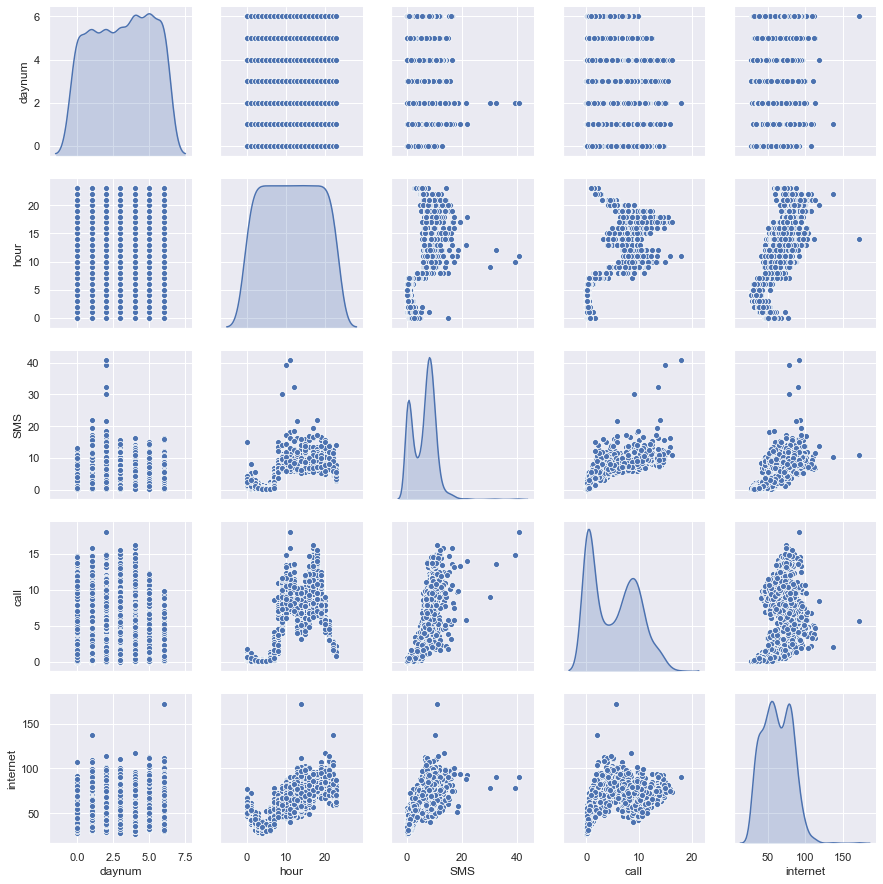

In [93]:
g = sns.pairplot(hourlydf[hourlydf.cellId == 1], vars= ['daynum','hour','SMS','call','internet'], diag_kind="kde")

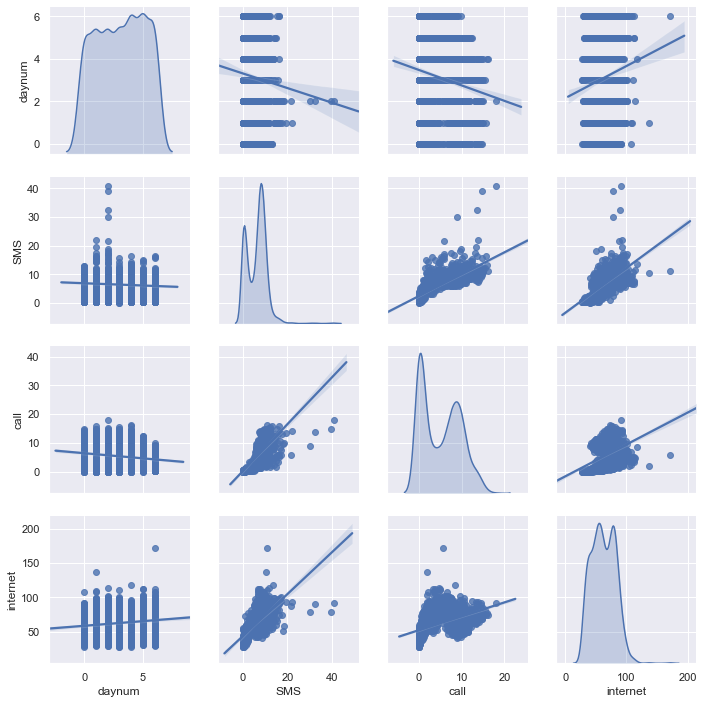

In [96]:
i = sns.pairplot(hourlydf[hourlydf.cellId == 1], vars= ['daynum','SMS','call','internet'], diag_kind="kde", kind="reg")

In [97]:
hourlydf.corr()

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,daynum
cellId,1.000000e+00,0.007631,0.112164,0.116567,0.108976,0.112156,0.134833,0.116509,0.111267,-0.000010,6.518275e-07
timeInterval,7.631219e-03,1.000000,0.006383,0.005931,0.005796,0.005967,0.004533,0.006379,0.005919,0.015814,-6.039595e-04
SMSin,1.121641e-01,0.006383,1.000000,0.895334,0.960479,0.953618,0.895376,0.987198,0.962082,0.157236,-6.499313e-02
SMSout,1.165667e-01,0.005931,0.895334,1.000000,0.842331,0.835209,0.843780,0.954913,0.843148,0.154450,-5.595979e-02
callIn,1.089758e-01,0.005796,0.960479,0.842331,1.000000,0.978196,0.852959,0.941873,0.993854,0.158884,-8.585931e-02
callOut,1.121556e-01,0.005967,0.953618,0.835209,0.978196,1.000000,0.836540,0.934749,0.995174,0.158620,-8.177292e-02
internet,1.348332e-01,0.004533,0.895376,0.843780,0.852959,0.836540,1.000000,0.898997,0.848878,0.107061,-3.659518e-02
SMS,1.165089e-01,0.006379,0.987198,0.954913,0.941873,0.934749,0.898997,1.000000,0.943234,0.160119,-6.336219e-02
call,1.112674e-01,0.005919,0.962082,0.843148,0.993854,0.995174,0.848878,0.943234,1.000000,0.159614,-8.415138e-02
hour,-9.977353e-06,0.015814,0.157236,0.154450,0.158884,0.158620,0.107061,0.160119,0.159614,1.000000,4.986068e-06


In [109]:
hourlydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14157694 entries, 0 to 14157693
Data columns (total 13 columns):
 #   Column          Dtype              
---  ------          -----              
 0   cellId          int64              
 1   timeIntervalts  datetime64[ns, CET]
 2   timeInterval    int64              
 3   SMSin           float64            
 4   SMSout          float64            
 5   callIn          float64            
 6   callOut         float64            
 7   internet        float64            
 8   SMS             float64            
 9   call            float64            
 10  hour            int64              
 11  day             object             
 12  daynum          int64              
dtypes: datetime64[ns, CET](1), float64(7), int64(4), object(1)
memory usage: 1.4+ GB


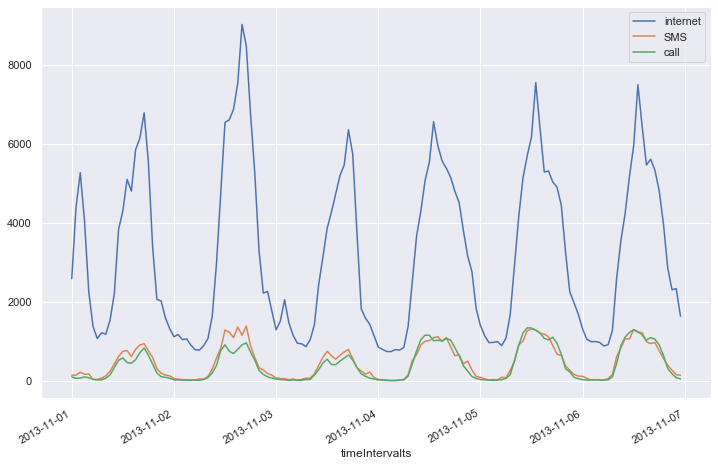

In [121]:
figsize(12,8)
sampledf = hourlydf[(hourlydf['cellId']==5060) & (hourlydf['timeIntervalts'] < '11-07-2013')][['timeIntervalts', 'internet','SMS','call']].set_index('timeIntervalts')
sampledf.plot()

In [122]:
y= sampledf.internet
y

timeIntervalts
2013-11-01 00:00:00+01:00    2583.326504
2013-11-01 01:00:00+01:00    4393.242239
2013-11-01 02:00:00+01:00    5271.079520
2013-11-01 03:00:00+01:00    4038.848988
2013-11-01 04:00:00+01:00    2241.505029
                                ...     
2013-11-06 19:00:00+01:00    3972.367155
2013-11-06 20:00:00+01:00    2858.836001
2013-11-06 21:00:00+01:00    2303.410345
2013-11-06 22:00:00+01:00    2329.590009
2013-11-06 23:00:00+01:00    1633.176712
Name: internet, Length: 144, dtype: float64

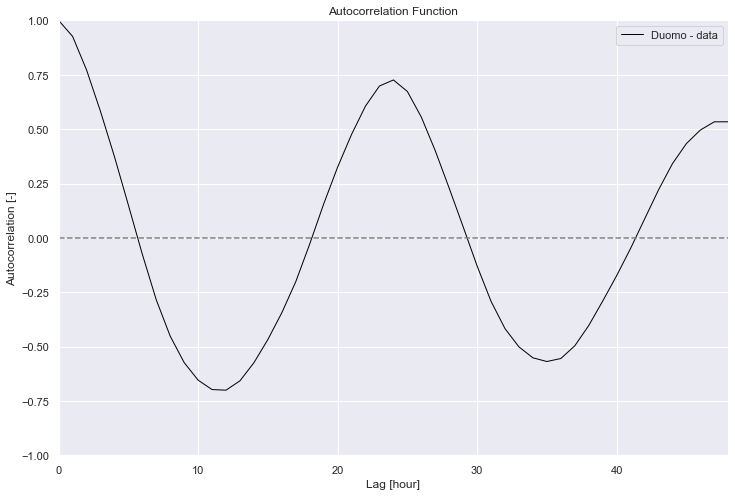

In [126]:
# Autocorellation (ACF) calc
from statsmodels.tsa.stattools import acf, pacf
acf_y = acf(y, nlags=48)

#Plot ACF: 
f = plt.figure()
plt.plot(acf_y, color='black', linewidth=1, linestyle='-', label='Duomo - data')
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel("Lag [hour]")
plt.ylabel("Autocorrelation [-]")
plt.xlim([0,48])
plt.ylim([-1,1])
plt.legend()
sns.despine()
plt.show()

In [166]:
firstweek = hourlydf[hourlydf.cellId==1].set_index('timeIntervalts').loc[:'2013-11-08']
firstday = hourlydf[hourlydf.cellId==1].set_index('timeIntervalts').loc['2013-11-01']
twoday = hourlydf[hourlydf.cellId==1].set_index('timeIntervalts').loc[:'2013-11-02']

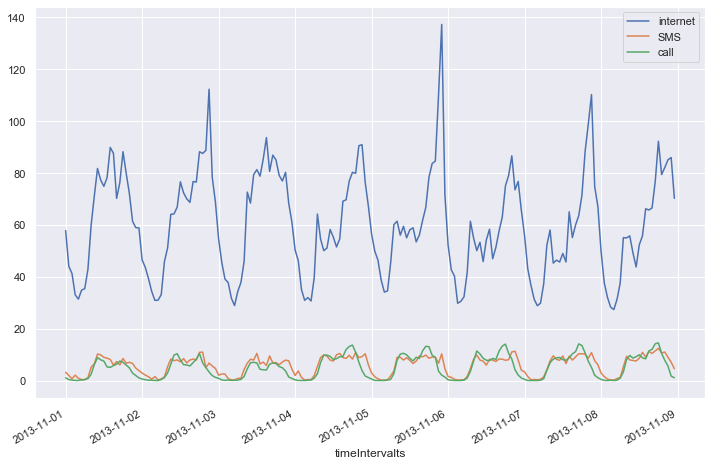

In [164]:
firstweek[['internet','SMS','call']].plot()

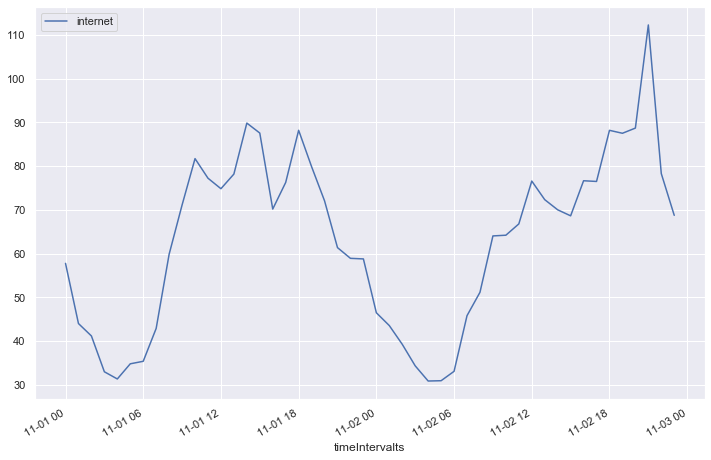

In [169]:
twoday[['internet']].plot()

In [ ]:
def sin_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [230]:
ydata = firstweek['internet']
xdata = firstweek.reset_index().index

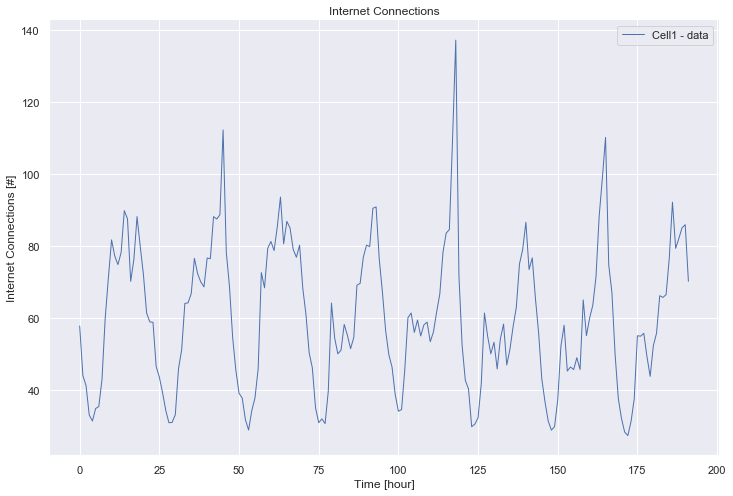

In [231]:
f = plt.figure()
plt.plot(xdata, ydata, linewidth=1, linestyle='-', label='Cell1 - data')
plt.title("Internet Connections")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.legend()
sns.despine()
plt.show()

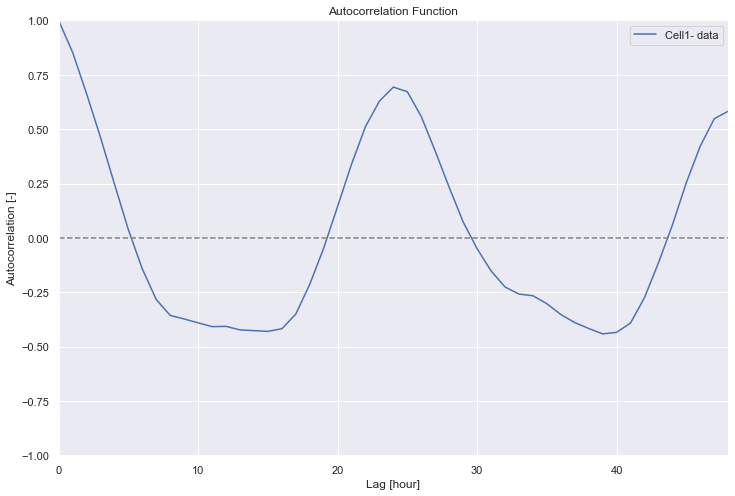

In [233]:
from statsmodels.tsa.stattools import acf, pacf
acf_y = acf(ydata, nlags=48)

#Plot ACF: 
f = plt.figure()
plt.plot(acf_y, label='Cell1- data')
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel("Lag [hour]")
plt.ylabel("Autocorrelation [-]")
plt.xlim([0,48])
plt.ylim([-1,1])
plt.legend()
plt.show()

In [178]:
import scipy
def func(xdata, a,b,c):
    return a*np.sin(2*np.pi*(1/24)*xdata+b)+c

In [1]:
popt,pcov = scipy.optimize.curve_fit(func, xdata, ydata)

print(popt)

f = plt.figure()
yfit = func(xdata, *popt)
plt.show()
#residual
residual = ydata - yfit
rss = np.sum(residual**2)
mean = np.mean(ydata)
b = popt[1] #phase shift (b) from curve_fit
#print('rss_navigli',rss_navigli,'mean_navigli',mean_navigli,'rss-norm',rss_navigli/mean_navigli)
#stddev = np.std(residual_navigli)
#print(np.std(residual_navigli))

yfit_duomo = yfit
b_duomo = b
ydata_duomo = ydata
xdata_duomo = xdata
T_peak_duomo = 18-(b_duomo%(2*np.pi))*(24/(2*np.pi))

ydata_moving_avg = ydata.rolling(window=24,center=False).mean()
residual_moving_avg = residual.rolling(window=24,center=False).mean()

NameError: name 'scipy' is not defined

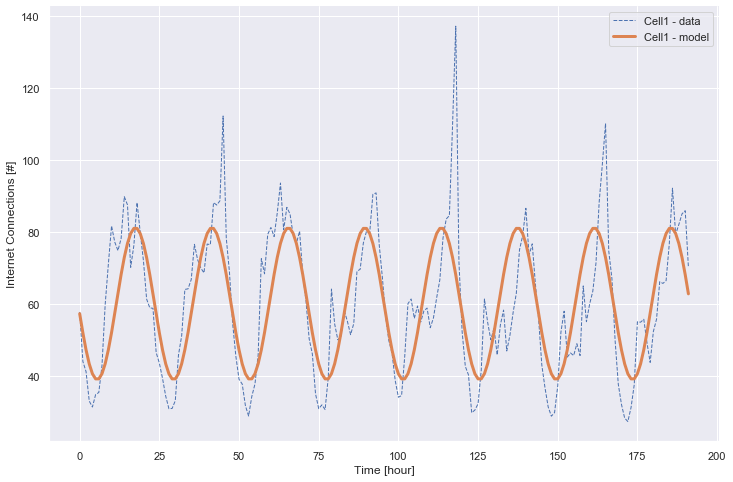

In [189]:
f = plt.figure()
plt.plot(xdata, ydata, linewidth=1, linestyle='--', label='Cell1 - data')
plt.plot(xdata, yfit, linewidth=3, label='Cell1 - model')
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
# plt.xlim([0,168])
# plt.ylim([0,10000])
plt.legend()
sns.despine()
plt.show()

In [213]:
hourlydf[hourlydf.cellId==5060].reset_index()

,index,cellId,timeIntervalts,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum
0,7163209,5060,2013-11-01 00:00:00+01:00,8299571400000,82.255739,54.767505,48.949981,47.705990,2583.326504,137.023244,96.655971,0,Friday,4
1,7163210,5060,2013-11-01 01:00:00+01:00,8299593000000,77.267004,60.036822,29.452804,29.297605,4393.242239,137.303826,58.750408,1,Friday,4
2,7163211,5060,2013-11-01 02:00:00+01:00,8299614600000,114.396735,97.000374,44.871477,19.159697,5271.079520,211.397109,64.031174,2,Friday,4
3,7163212,5060,2013-11-01 03:00:00+01:00,8299636200000,93.582932,67.401305,36.461082,57.937116,4038.848988,160.984236,94.398198,3,Friday,4
4,7163213,5060,2013-11-01 04:00:00+01:00,8299657800000,113.822065,54.369384,34.249213,36.239912,2241.505029,168.191449,70.489125,4,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,7164620,5060,2013-12-29 19:00:00+01:00,8330049000000,225.975369,111.394567,142.727533,226.439696,3341.840877,337.369935,369.167229,19,Sunday,6
1412,7164621,5060,2013-12-29 20:00:00+01:00,8330070600000,119.988587,35.167060,65.042786,90.432107,1961.331291,155.155647,155.474893,20,Sunday,6
1413,7164622,5060,2013-12-29 21:00:00+01:00,8330092200000,107.750875,46.868632,30.565767,43.084761,1492.356551,154.619506,73.650527,21,Sunday,6
1414,7164623,5060,2013-12-29 22:00:00+01:00,8330113800000,87.608294,60.331087,28.396657,33.533506,1286.540015,147.939382,61.930163,22,Sunday,6


In [ ]:
for i in [1,2,24,168]:
    print('lag = '+str(i)+' hrs auto correlation is ' + str(hourlydf['SMS'].autocorr(lag=i)))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

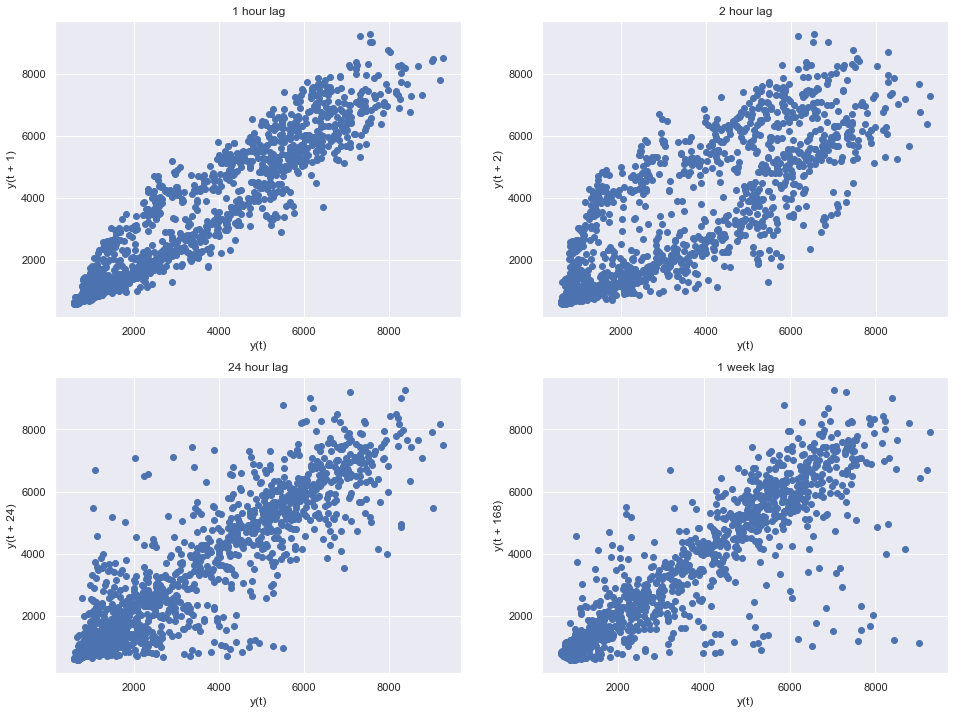

In [229]:
plt.figure(figsize=(16,12))
plt.subplot(221)
pd.plotting.lag_plot(hourlydf[hourlydf.cellId==5060].reset_index()['internet'],lag=1)
plt.title('1 hour lag')
plt.subplot(222)
pd.plotting.lag_plot(hourlydf[hourlydf.cellId==5060].reset_index()['internet'],lag=2)
plt.title('2 hour lag')
plt.subplot(223)
pd.plotting.lag_plot(hourlydf[hourlydf.cellId==5060].reset_index()['internet'],lag=24)
plt.title('24 hour lag')
plt.subplot(224)
pd.plotting.lag_plot(hourlydf[hourlydf.cellId==5060].reset_index()['internet'],lag=168)
plt.title('1 week lag')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(hourlydf['internet'], lags=20)
plt.show()